### <font color='blue'>テキストコーパスの探索</font>

特定のチャンカにマッチする句を、テキストから抜き出すことも可能。<br>

In [2]:
# ライブラリのimport
import nltk

In [3]:
# チャンキング文法の構築
cp = nltk.RegexpParser('CHUNK: {<V.*> <TO> <V.*>}')

In [4]:
# ブラウンコーパスの読み込み
brown = nltk.corpus.brown

In [6]:
for sent in brown.tagged_sents()[:20]:
    tree = cp.parse(sent)
    for subtree in tree.subtrees():
        if subtree.label() == 'CHUNK':print(subtree)

(CHUNK combined/VBN to/TO achieve/VB)
(CHUNK continue/VB to/TO place/VB)


### <font color='blue'>チンキング</font>

チャンクから取り除きたいものを定義することが簡単な場合もある。<br>
その場合、チャンクに含まれないトークンの配列をチンクとして定義可能。<br>

以下では、'barked/VBD' 'at/IN' がチンクである。<br>

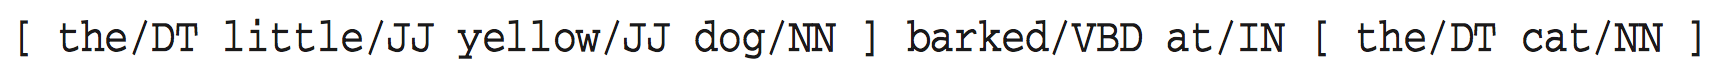

In [7]:
from IPython.display import Image
Image(filename='IMG/7-6.png', width=600)

チンキングはチャンクからトークン列を取り除く作業である。<br>

In [9]:
# チャンク文法とチンキング
grammar = """
    NP:
    {<.*>+}          # Chunk everything
    }<VBD|IN>+{      # Chink sequences of VBD and IN
"""

In [11]:
# チンキングする文章
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
       ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]

In [12]:
cp = nltk.RegexpParser(grammar)

In [13]:
print(cp.parse(sentence))

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


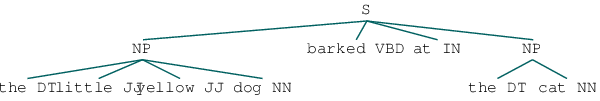

In [14]:
cp.parse(sentence)